In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ctf = open('CE/CCE2full')
lst = [[] for i in range(600)] # 600 * 100
lines = ctf.readlines()
for l in lines:
    ns = l.split('\t')
    key = float(ns[0])
    value = float(ns[1])
    lst[int(key)].append(value)

full = np.array(lst)
full_mean = np.mean(full, axis = 1)
full_std = np.std(full, axis = 1)

In [3]:
gwf = open('CE/GWEelite')

gwl = [[] for i in range(80)]
gwlines = gwf.readlines()

for l in gwlines:
    ns = l.split('\t')
    key = float(ns[0])
    value = float(ns[1])
    gwl[int(key)].append(value)

gwn = np.array(gwl)
re = gwn.reshape((40,200))
new_mean = np.mean(re, axis = 1)
new_std = np.std(re, axis = 1)

In [4]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [5]:
gw_qle = np.loadtxt('gw_ql_ep.dat')
gw_qls = np.loadtxt('gw_ql_sm.dat')
gw_sae = np.loadtxt('gw_sarsa_ep.dat')
gw_sas = np.loadtxt('gw_sarsa_sm.dat')

In [6]:
def plot_rl(data, x = None, label = None):
    R, N = data.shape
    y_mean = np.mean(data, axis = 0)
    y_std = np.std(data, axis = 0)
    if x is not None:
        errorfill(x, y_mean, y_std, label)
    else:
        x = np.arange(R)
        errorfill(x, y_mean, y_std, label)

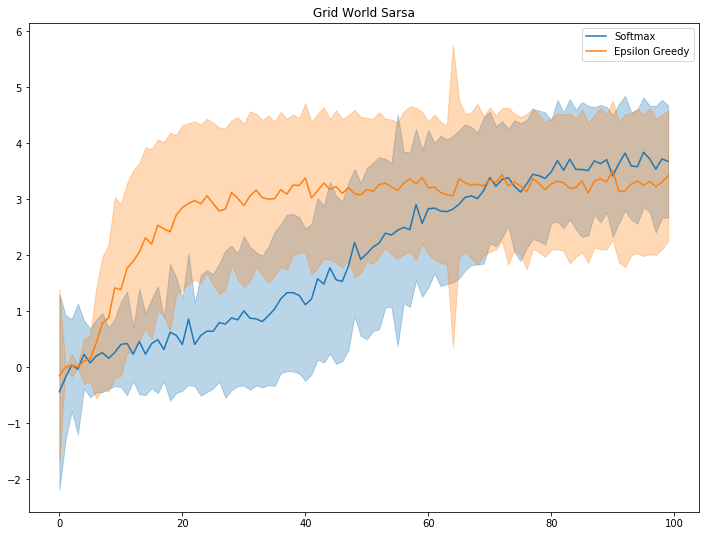

In [7]:
fig = plt.figure(figsize = (12, 9))
plot_rl(gw_sas)
plot_rl(gw_sae)
plt.title("Grid World Sarsa")
ax = plt.gca()
ax.legend(['Softmax','Epsilon Greedy'])
plt.show()

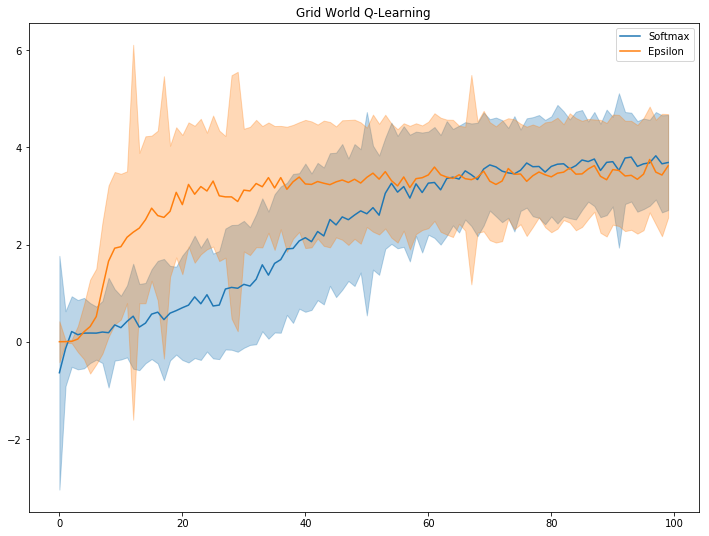

In [8]:
fig = plt.figure(figsize = (12, 9))
plot_rl(gw_qls)
plot_rl(gw_qle)
plt.title("Grid World Q-Learning")
ax = plt.gca()
ax.legend(['Softmax', 'Epsilon'])
plt.show()

In [9]:
def read_file_and_plot(filename1, filename2, title, legends):
    data1 = np.loadtxt(filename1)
    data2 = np.loadtxt(filename2)
    
    fig = plt.figure(figsize = (12, 9))
    plot_rl(data1)
    plot_rl(data2)
    plt.title(title)
    ax = plt.gca()
    ax.legend(legends)
    plt.show()

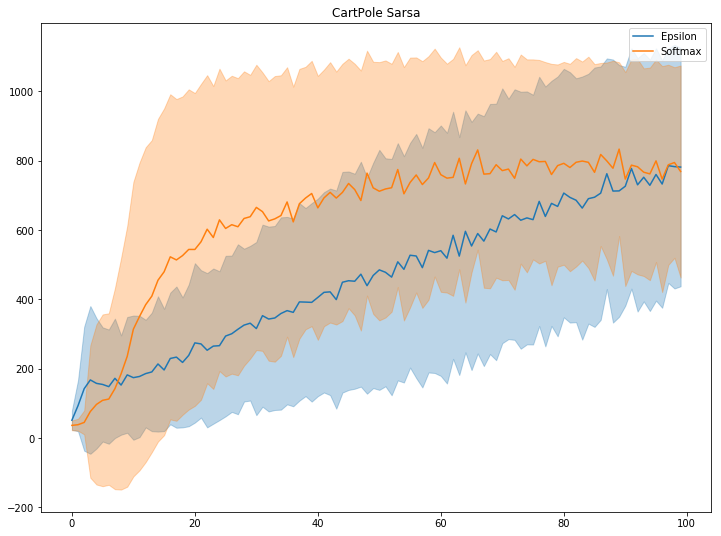

In [10]:
read_file_and_plot('cp_sarsa_ep.dat', 'cp_sarsa_sm.dat', 'CartPole Sarsa', ['Epsilon','Softmax'])

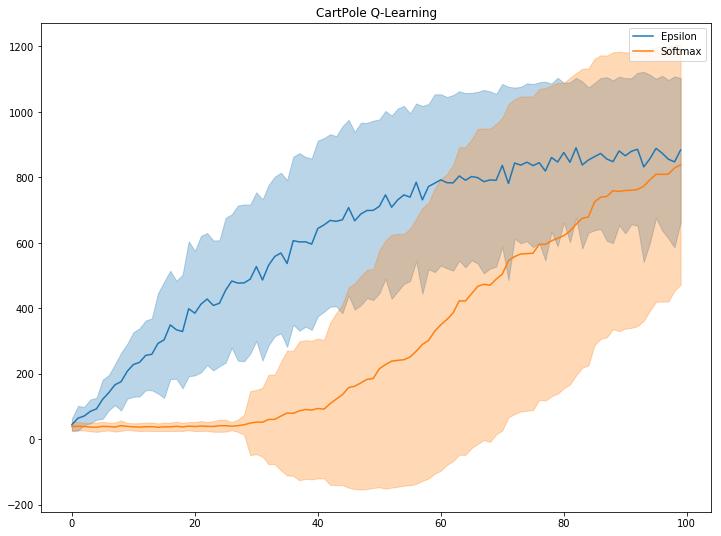

In [11]:
read_file_and_plot('cp_ql_ep.dat', 'cp_ql_sm.dat', 'CartPole Q-Learning', ['Epsilon','Softmax'])

In [12]:
cp_sae = np.loadtxt('cp_sarsa_ep.dat')
cp_sas = np.loadtxt('cp_sarsa_sm.dat')
cp_qle = np.loadtxt('cp_ql_ep.dat')
cp_qls = np.loadtxt('cp_ql_sm.dat')

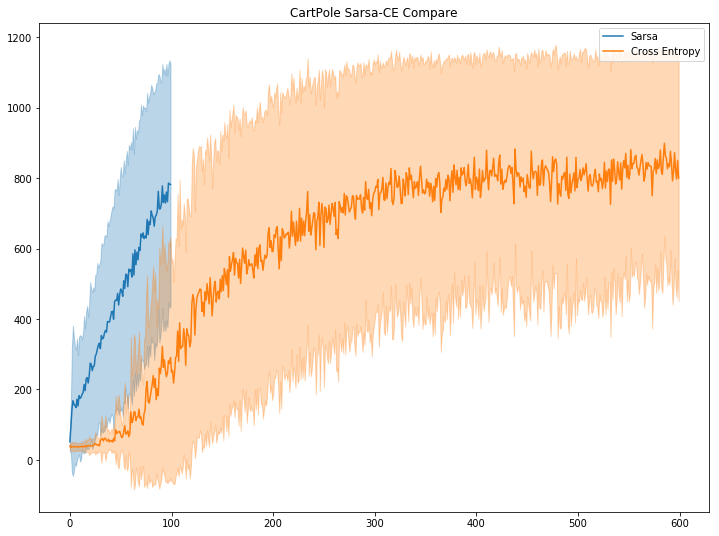

In [13]:
fig = plt.figure(figsize = (12, 9))
plot_rl(cp_sae)

full_x = np.arange(600)
errorfill(full_x, full_mean, full_std)

plt.title("CartPole Sarsa-CE Compare")

ax = plt.gca()
ax.legend(['Sarsa', 'Cross Entropy'])
plt.show()

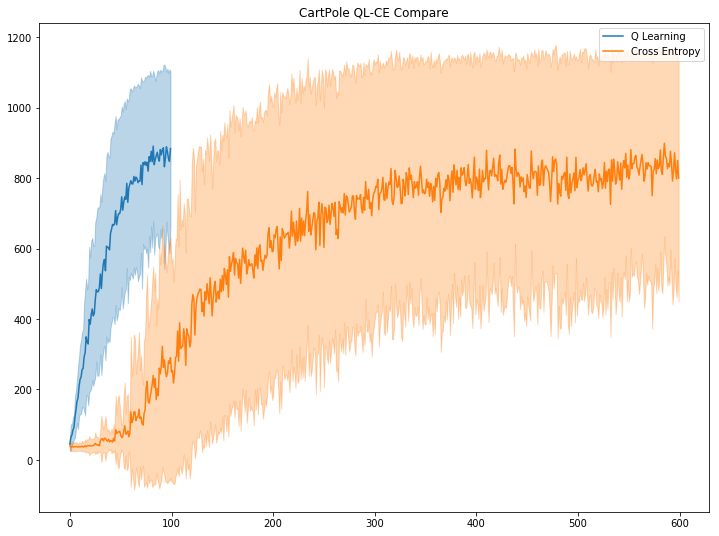

In [14]:
fig = plt.figure(figsize = (12, 9))
plot_rl(cp_qle)

full_x = np.arange(600)
errorfill(full_x, full_mean, full_std)

plt.title("CartPole QL-CE Compare")

ax = plt.gca()
ax.legend(['Q Learning', 'Cross Entropy'])
plt.show()

In [15]:
f = open('CE/400.dat')
lines = f.readlines()
lst = [[] for i in range(11200)]

for l in lines:
    ns = l.split('\t')
    key = float(ns[0])
    value = float(ns[1])
    lst[int(key)].append(value)
    
res = np.array(lst)
gw_mean = np.mean(res, axis =1)
gw_stderr = np.std(res, axis = 1)

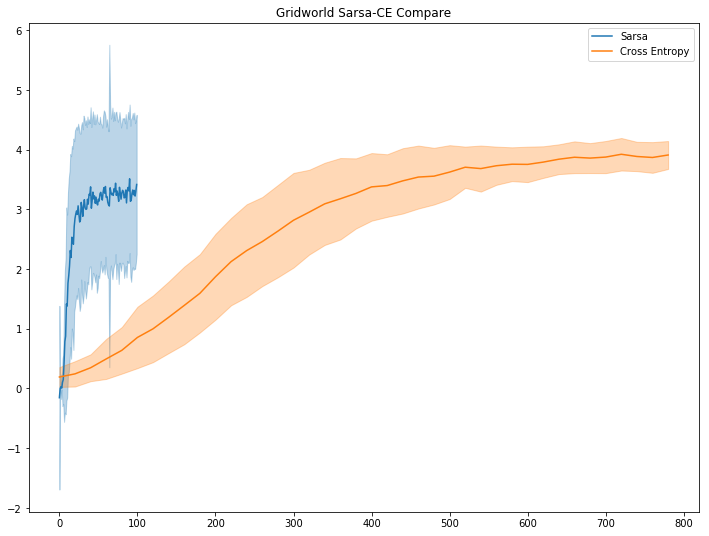

In [16]:
fig = plt.figure(figsize = (12, 9))
plot_rl(gw_sae)

nex_x = np.arange(0, 800, 20)
gw_x = np.arange(11200)
errorfill(nex_x, new_mean, new_std)
#errorfill(gw_x, gw_mean, gw_stderr)

plt.title("Gridworld Sarsa-CE Compare")

ax = plt.gca()
ax.legend(['Sarsa', 'Cross Entropy'])
plt.show()

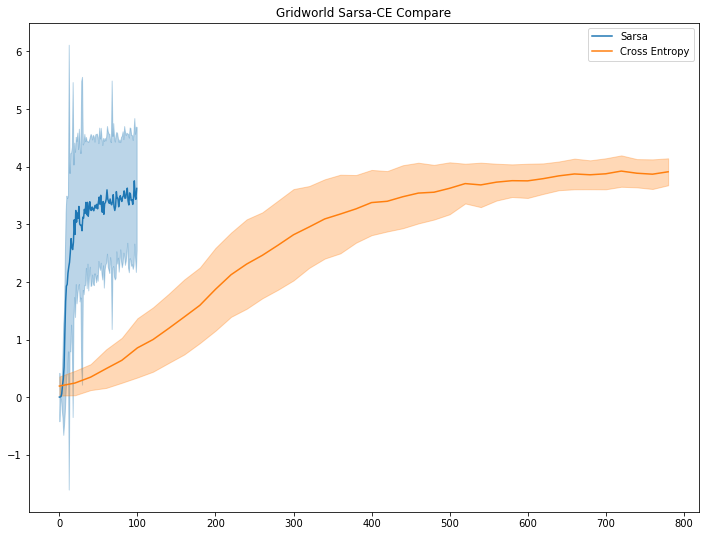

In [17]:
fig = plt.figure(figsize = (12, 9))
plot_rl(gw_qle)

nex_x = np.arange(0, 800, 20)
gw_x = np.arange(11200)
errorfill(nex_x, new_mean, new_std)
#errorfill(gw_x, gw_mean, gw_stderr)

plt.title("Gridworld Sarsa-CE Compare")

ax = plt.gca()
ax.legend(['Sarsa', 'Cross Entropy'])
plt.show()

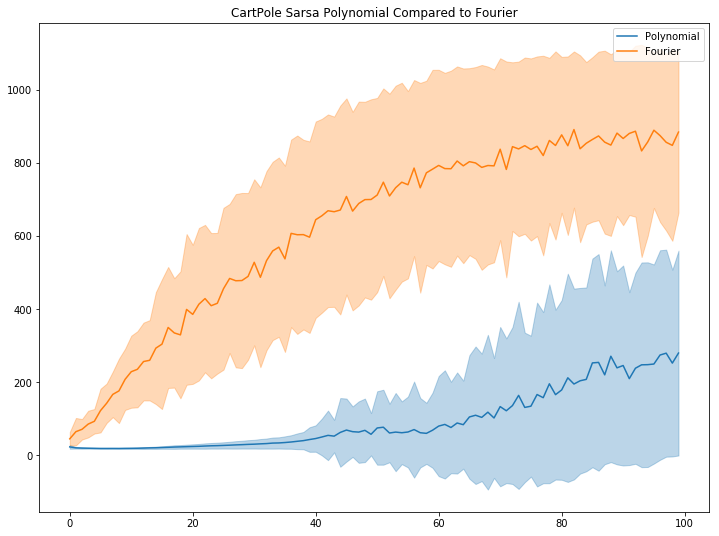

In [31]:
read_file_and_plot('cp_ql_pl2.dat', 'cp_ql_ep.dat', 'CartPole Sarsa Polynomial Compared to Fourier', ['Polynomial','Fourier'])

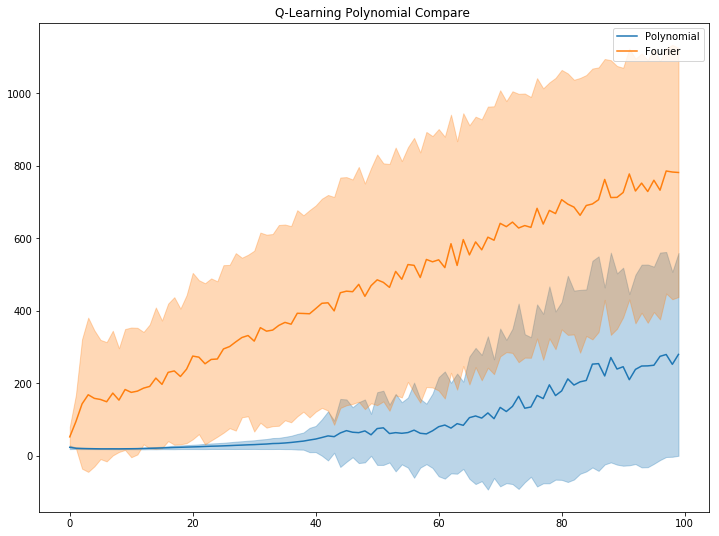

In [32]:
read_file_and_plot('cp_ql_pl2.dat', 'cp_sarsa_ep.dat', 'Q-Learning Polynomial Compare ', ['Polynomial','Fourier'])